In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = '/datalab/digest/Colonoscopy_tissue_segment_dataset/tissue-train-pos-v1.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip1: 

    zip1.extractall('/datalab/digest/Colonoscopy_tissue_segment_dataset') 
    print('Done!') 

In [7]:
!ls

colon_classification.ipynb  model_2019_08_26
colon_extra.ipynb	    model_2019_08_27
Colon_post.ipynb	    model_2019_08_29
colon_unet.ipynb	    model_2019_08_30
colon_unet_resized.ipynb    model_2019_09_19
discard_cn_overlap	    model_2019_09_21
discard_non_normalized	    model_class_2019_09_24
discard_normalized	    model_was2019_08_21
input_cn_overlap_test	    predict_unet_colon.ipynb
input_cn_overlap_train	    pytorch_unet.ipynb
input_cn_overlap_train.zip  requirements_datalab.txt
input_cn_overlap_val	    requirements.txt
input_non_normalized	    sample.jpg
input_normalized	    tissue-train-neg_norm
input_overlap		    tissue-train-neg_norm.zip
__MACOSX		    tissue-train-pos-v1_color_normalized
mask_cn_overlap_test	    tissue-train-pos-v1_mask
mask_cn_overlap_train	    tissue-train-pos-v1.zip
mask_cn_overlap_train.zip   whole_pred
mask_cn_overlap_val	    whole_pred_2019_09_23
masked_img		    whole_pred_2019_09_25
masked_img_sep		    whole_pred_junk_2019_09_26
mask_non_normalized	    w

In [77]:
def find_dice(seg,gt):

    dice = np.sum(seg[gt==1])*2.0 / (np.sum(seg) + np.sum(gt))
    print('find_dice',dice)
    return dice_coef

def post_process(img_temp):
#     img_temp = np.array(img_temp > threshold,dtype=np.float32)        
    img_temp = scipy.ndimage.morphology.binary_fill_holes(img_temp)
#     img_temp = morphology.remove_small_objects(img_temp, 2000)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21)).flatten()
    img_temp = np.asarray(img_temp,dtype=np.uint8)
#     print(img_temp)
    print(type(skimage.morphology.selem.disk(7)))
    
    img_temp=cv2.erode(img_temp, np.asarray(skimage.morphology.selem.disk(7),dtype=np.logical), iterations=3)
    img_temp=cv2.erode(img_temp, kernel, iterations=1)
    img_temp=skimage.morphology.reconstruction(img_temp,skimage.morphology.selem.disk(3))
    proc_img=(scipy.ndimage.morphology.binary_fill_holes(img_temp3)).astype(np.float)
    return proc_img

abspath /datalab/digest/Colonoscopy_tissue_segment_dataset/whole_pred_test_2019_09_26
(6246, 5363, 3)


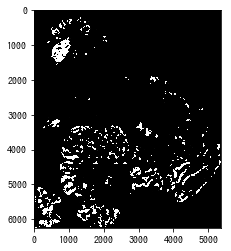

<class 'numpy.ndarray'>


AttributeError: module 'numpy' has no attribute 'logical'

In [78]:
mypath = 'whole_pred_test_2019_09_26'
from os import listdir
from os.path import isfile, join
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import morphology
import scipy
import numpy as np
# print(skimage.morphology.selem.disk(3))
# print(skimage.morphology.selem.disk(3))

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filelist = []
for filename in onlyfiles:
    if "prob" in filename:
#         print(filename)
        temp = None
    else:
        filelist.append(filename)

abspath = os.path.abspath(mypath)
print('abspath',abspath)
for bimg_name in filelist:
#     print(os.path.join(abspath,bimg_name))
    Bimg = cv2.imread(os.path.join(abspath,bimg_name))
    print(Bimg.shape)
    plt.imshow(Bimg)
    plt.show()
    proc_img = post_process(Bimg)
    plt.imshow(proc_img)
    plt.show()
    break
    
#     print(Bimg.shape)
#     find_dice(Bimg,Bimg)
#     img = cv2.imread(r'/datalab/digest/Colonoscopy_tissue_segment_dataset/18-02792B_2019-05-07 22_35_03-lv1-2384-13662-5614-5104_prob.jpg')
    

In [8]:
!pwd

/datalab/digest/Colonoscopy_tissue_segment_dataset


In [58]:
import skimage
from skimage import morphology
morphology.selem.disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)